# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/full-x4/2021-11-05_18-09-50"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,05/11/2021_18:09:53,599,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.81,34.31,40.38,59.56,39.88,Prendido
1,05/11/2021_18:09:59,599,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.81,34.25,40.38,59.44,39.88,Prendido
2,05/11/2021_18:10:05,602,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.81,34.25,40.38,59.56,39.81,Prendido
3,05/11/2021_18:10:10,601,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.81,34.31,40.38,59.56,39.81,Prendido
4,05/11/2021_18:10:16,603,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.81,34.25,40.38,59.69,39.88,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,05/11/2021_18:19:10,641,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.94,34.56,40.31,60.31,40.13,Apagado
96,05/11/2021_18:19:16,640,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.94,34.56,40.31,60.19,40.13,Apagado
97,05/11/2021_18:19:22,641,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,41.94,34.56,40.31,60.06,40.06,Apagado
98,05/11/2021_18:19:27,640,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,42.00,34.56,40.31,59.88,40.13,Prendido


In [5]:
df0['CO2']

0     599
1     599
2     602
3     601
4     603
     ... 
95    641
96    640
97    641
98    640
99    640
Name: CO2, Length: 100, dtype: int64

In [6]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

05/11/2021_18:09:53


In [7]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

313


In [8]:
# Llenemos las listas con los datos
for i in range(n-1):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [9]:
#co2[np.where(co2=='!Warning: Clearing Byte: 154')[0][0]]=-1
#co2[np.where(co2=='!Warning: Clearing Byte: 49')[0][0]]=-1
#co2[np.where(co2=='!Warning: Clearing Byte: 49')[0][0]]=-1

In [10]:
#Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos

#Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1=np.where(np.diff(estado_valvula_co2_1)==1) #encuentro el número de posición del primer momento de la danza
pos2=np.where(np.diff(estado_valvula_co2_2)==1) #y así con los demás
pos3=np.where(np.diff(estado_valvula_co2_3)==1)
pos4=np.where(np.diff(estado_valvula_co2_4)==1)
pos5=np.where(np.diff(estado_valvula_compost_4)==1)

pos=[] #los guardo ordenados
for i in range(len(pos1[0])):
    pos.append(int(pos1[0][i]))
    pos.append(int(pos2[0][i]))
    pos.append(int(pos3[0][i]))
    pos.append(int(pos4[0][i]))
    pos.append(int(pos5[0][i]))
  

danza=[] #guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

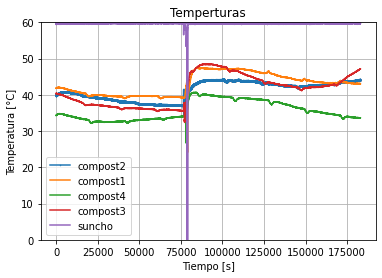

In [11]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho,'.-',markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1,'-',markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2,'-',markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3,'-',markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4,'-',markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,60)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

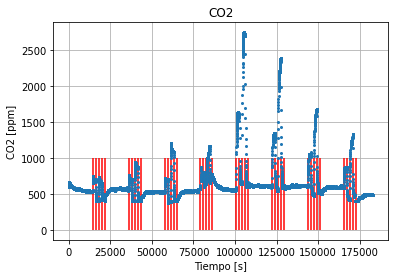

In [12]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=1000,color='r')
plt.grid()
#plt.ylim(20,1500)
#plt.xlim(115000,175000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
#plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

In [13]:
np.where(co2=='!Warning: Clearing Byte: 49')

<ipython-input-13-5cf3614ab437>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np.where(co2=='!Warning: Clearing Byte: 49')


(array([], dtype=int64),)

# Integración

In [14]:
#Primero definimos los límites de integración, con "inicio" y "fin". SOLO VISUALIZACIÓN

#No hay que manejarse con segundos, porque a veces difieren en 5seg y a veces en 6seg; eso trae problemas
#Manejarse con posiciones

#Evitamos los primeros 5 minutos de cada danza de válvula, para dar lugar a la estabilización


inicio_x=[] #posición desde que medimos
inicio_y=[]
for i in range(len(pos)):
    inicio_x.append(tiempos[pos[i]+60]) #dejamos 60 posiciones (5 minutos aprox) de espera
    inicio_y.append(co2[pos[i]+60]) #dejamos 60 posiciones (5 minutos aprox) de espera
    
fin_x=[]
fin_y=[]
for i in range(len(pos)-1):
    fin_x.append(tiempos[pos[i+1]])
    fin_y.append(co2[pos[i+1]])

#Remuevo los multiplos de 4, porque estarían de más
for i in range(len(pos1[0])-1):
    inicio_x.pop(4*(i+1))
    inicio_y.pop(4*(i+1))    
    fin_x.pop(4*(i+1))
    fin_y.pop(4*(i+1))

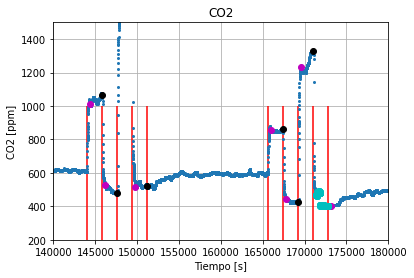

In [15]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=1000,color='r')
plt.grid()
plt.ylim(200,1500)
plt.xlim(140000,180000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.scatter(inicio_x,inicio_y,color='m',zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(fin_x,fin_y,color='k',zorder=5) #marco el fin de cada área en color negro

#plt.scatter(tiempos[pos[38]+60:pos[38+1]],co2[pos[38]+60:pos[38+1]],color='c',zorder=5)  #prueba
plt.show()

In [16]:
#Ahora si, calculo el área:

area=[]
for i in range(len(pos)-1):
    area.append(trapezoid(co2[pos[i]+60:pos[i+1]],tiempos[pos[i]+60:pos[i+1]]))

for i in range(len(pos1[0])-1):
    area.pop(4*(i+1)) #remuevo el bache del medio
    
print(area)

[988622.0, 588057.0, 972611.0, 637989.5, 1026005.5, 582982.5, 1286449.5, 603635.0, 1006854.5, 564848.0, 1602333.5, 585495.0, 1093228.5, 924567.5, 1522171.5, 1059540.5, 2338944.0, 932278.5, 3925049.5, 905805.5, 1885632.5, 825351.5, 3323029.5, 868526.5, 1497286.0, 719544.5, 2353336.0, 758893.5, 1230042.0, 621363.5, 1809345.0, 618836.0]


In [30]:
#Reordeno

area1=[]
area2=[]
area3=[]
area4=[]

for i in range(int(len(area)/4)):
    area1.append(area[4*i])
    area2.append(area[4*i+1])
    area3.append(area[4*i+2])
    area4.append(area[4*i+3])

1
5
9
13
17
21
25
29


In [31]:
area2

[588057.0,
 582982.5,
 564848.0,
 924567.5,
 932278.5,
 825351.5,
 719544.5,
 621363.5]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [44]:
F=1.5
den=22414*0.001*10**6

def gramos(x): #meter el área
    return F*x*44/(den*60)

In [53]:
gramos(np.array(area1))

array([0.04851808, 0.05035273, 0.04941286, 0.0536518 , 0.11478712,
       0.09254019, 0.07348151, 0.06036612])